<a href="https://colab.research.google.com/github/Molten-Ice/Kaggle/blob/dev/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'1.13.1+cu116'

In [3]:
weight = 0.7
bias = 0.3
weight, bias

(0.7, 0.3)

In [4]:
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [5]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [6]:
# Splitting into training and test sets
train_split = int(0.8*len(X))
train_split
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

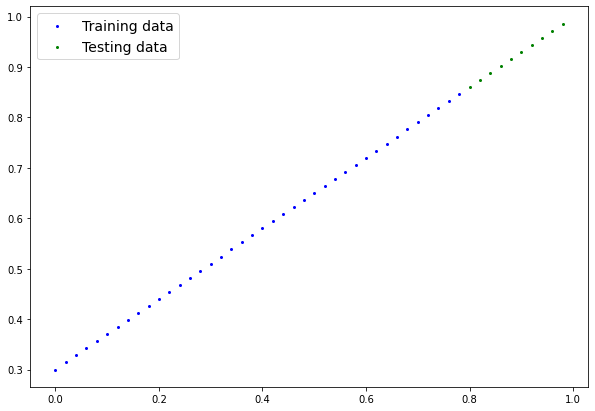

In [7]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plotting training, test data & predictions
  """
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data") 
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data") 

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions data") 

  plt.legend(prop={"size": 14})
  plt.show()

plot_predictions()

# Building model

In [8]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))
    
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias 


In [9]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [12]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

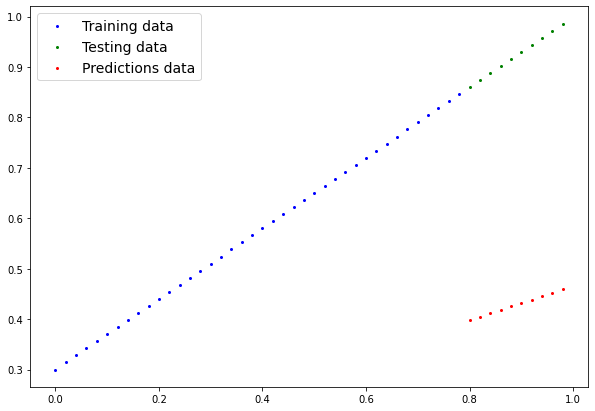

In [13]:
plot_predictions(predictions=y_preds)

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

# Full Model

In [16]:
#hyperparameters:
lr = 0.1
lr_decay = 0.95
epochs = 75

torch.manual_seed(42)
model_0 = LinearRegressionModel()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = lr)
lambda1 = lambda epoch: lr_decay ** epoch
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)
model_0, loss_fn, optimizer, scheduler

(LinearRegressionModel(), L1Loss(), SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     initial_lr: 0.1
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ), <torch.optim.lr_scheduler.LambdaLR at 0x7f02daa7e250>)

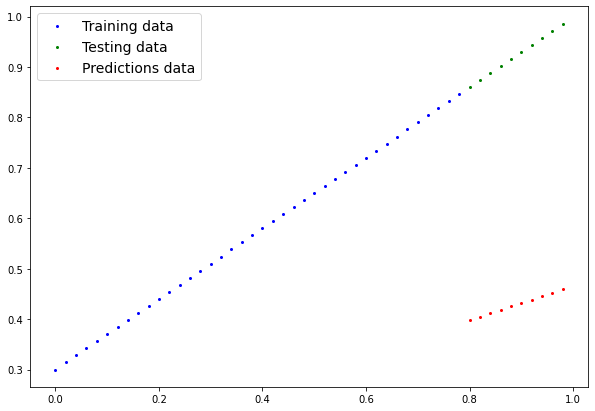

Epoch: 0 | Loss: 0.31290000677108765 | Test loss: 0.3598000109195709
Epoch: 5 | Loss: 0.04410000145435333 | Test loss: 0.09510000050067902
Epoch: 10 | Loss: 0.032099999487400055 | Test loss: 0.0722000002861023
Epoch: 15 | Loss: 0.02280000038444996 | Test loss: 0.050599999725818634
Epoch: 20 | Loss: 0.015599999576807022 | Test loss: 0.033900000154972076
Epoch: 25 | Loss: 0.009999999776482582 | Test loss: 0.021199999377131462
Epoch: 30 | Loss: 0.00570000009611249 | Test loss: 0.011300000362098217
Epoch: 35 | Loss: 0.006000000052154064 | Test loss: 0.02160000056028366
Epoch: 40 | Loss: 0.010599999688565731 | Test loss: 0.0010999999940395355
Epoch: 45 | Loss: 0.005799999926239252 | Test loss: 0.012400000356137753
Epoch: 50 | Loss: 0.004699999932199717 | Test loss: 0.0015999999595806003
Epoch: 55 | Loss: 0.002199999988079071 | Test loss: 0.006399999838322401
Epoch: 60 | Loss: 0.003100000089034438 | Test loss: 0.000699999975040555
Epoch: 65 | Loss: 0.00139999995008111 | Test loss: 0.00380000

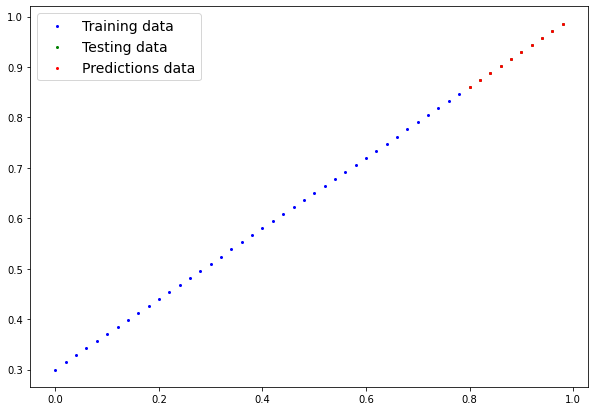

In [17]:
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

test_loss_values = []
losses = []
lrs = []

for epoch in range(epochs):
  model_0.train()

  #Forward pass
  y_pred = model_0.forward(X_train)

  #Calculate loss
  loss = loss_fn(y_pred, y_train)

  #Optimizer zero grad
  optimizer.zero_grad()

  #Perform backpropagation
  loss.backward()
  losses.append(loss)
  #Step the optimizer
  optimizer.step()
  lrs.append(optimizer.param_groups[0]["lr"])
  scheduler.step()

  model_0.eval() # turns off gradient tracking
  #turns off different settings not needed for evaluation/testing (dropout/batch norm layers)

  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)
  test_loss_values.append(test_loss)

  if epoch % 5 == 0:    
    print(f'Epoch: {epoch} | Loss: {np.round(loss.detach().numpy(), 4)} | Test loss: {torch.round(test_loss, decimals = 4)}')

with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6970])), ('bias', tensor([0.3021]))])

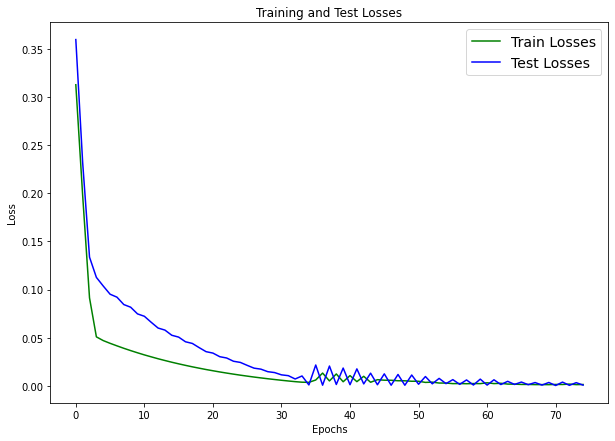

In [23]:
plt.figure(figsize=(10, 7))
plt.plot([i for i in range(len(losses))], [x.detach() for x in losses], c="g", label="Train Losses") 
plt.plot([i for i in range(len(test_loss_values))], [x.detach() for x in test_loss_values], c="b", label="Test Losses") 
plt.legend(prop={"size": 14})
plt.title("Training and Test Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

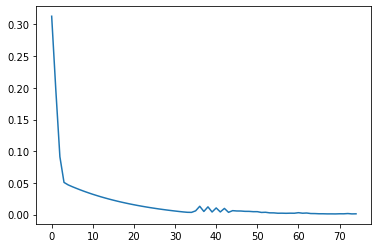

In [20]:
plt.plot([i for i in range(len(losses))], [x.detach() for x in losses])

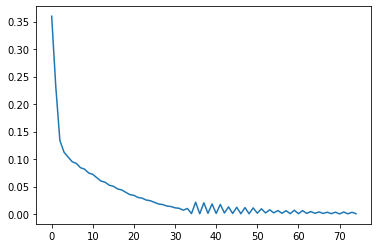

In [21]:
plt.plot([i for i in range(len(test_loss_values))], [x.detach() for x in test_loss_values])

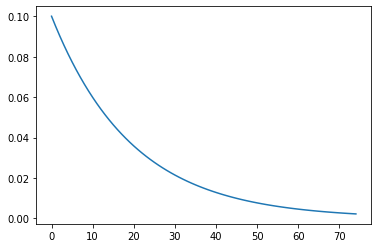

In [22]:
plt.plot([i for i in range(len(lrs))], [x for x in lrs])